Sebuah perusahaan sedang mempelajari kebiasaan dari Customer dan berusaha mencari peluang untuk meningkatkan penjualan dari berbagai channel penjualan yang dikelola oleh perusahaan tersebut.

Berdasarkan file Marketing Campaign yang di publish oleh perusahaan tersebut, terdapat data dictionary yang dapat di analisa yaitu sebagai berikut,

1. People:
- ID: Unique identifier for each customer.
- Year_Birth: Customer's birth year.
- Education: Customer's education level.
- Marital_Status: Customer's marital status.
- Income: Customer's Yearly household income.
- Kidhome: Number of children in the household.
- Teenhome: Number of teenagers in the household.
- Dt_Customer: Date of Customer enrollment with the company.
- Recency: Number of days since the last purchase.
- Complain: 1 if the Customer complained in the last 2 years, 0 otherwise.

2. Products, amounts spent on different product categories in the last 2 years:
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds

3. Promotion:
- NumDealsPurchases: Number of purchases made with a discount.
- AcceptedCmp1:	1 if customer accepted the offer in the 1st campaign, 0 otherwise.
- AcceptedCmp2:	1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
- AcceptedCmp3:	1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
- AcceptedCmp4:	1 if customer accepted the offer in the 4th campaign, 0 otherwise.
- AcceptedCmp5:	1 if customer accepted the offer in the 5th campaign, 0 otherwise.
- Response:	1 if customer accepted the offer in the last campaign, 0 otherwise.

4. Place:
- NumWebPurchases: Number of purchases made through the company's website.
- NumCatalogPurchases: Number of purchases made using a catalogue.
- NumStorePurchases: Number of purchases made directly in stores.
- NumWebVisitsMonth: Number of visits to company's web site in the last month.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_marcamp = pd.read_csv("https://raw.githubusercontent.com/yohaneskh/Customer-Personality-Analysis/refs/heads/main/marketing_campaign.csv", sep="\t")

In [4]:
# Menampilkan 5 baris pertama dari sebuah data
df_marcamp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
with pd.option_context("display.max_columns", None):
    display(df_marcamp)

# No of rows: 2240
# No of columns: 29

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
df_marcamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Terdapat data yang Null atau Na di column Income sebanyak 24 Customer.

Lalu ditemukan juga kejanggalan type data Dt_Customer yang masih berupa object, bukan datetime.

Pertama-tama mari kita convert type data Dt_Customer dari menjadi datetime.

In [8]:
# Merubah type data Year_Birth dari object menjadi datetime
df_marcamp.Dt_Customer = df_marcamp.Dt_Customer.astype("datetime64[ns]")
df_marcamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Selanjutnya kita dapat melihat data Customer dengan missing values.

In [10]:
df_marcamp_customer_with_missing_value = df_marcamp[df_marcamp.isna().sum(axis=1) > 0]
df_marcamp_customer_without_missing_value = df_marcamp[df_marcamp.notna()]

Berikut hasil pengecekan data 24 Customer yang tidak memiliki data Income/penghasilan (NaN).

In [12]:
# Menampilkan data Customer dengan missing values
with pd.option_context("display.max_columns", None):
     display(df_marcamp_customer_with_missing_value)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Berikut hasil pengecekkan data Customer dengan data yang lengkap.

In [14]:
# Menampilkan data Customer tanpa missing values
with pd.option_context("display.max_columns", None):
    display(df_marcamp_customer_without_missing_value)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [15]:
# Seberapa besar presentase Customer dengan missing values (NaN) di kolom Income?
# Ternyata hanya +/- 1% saja dari total seluruh Customer
# Sehingga tidak akan memberikan efek yang signifikan jika nantinya value Income tidak digunakan dalam analisa data
# Menampilkan presentase nmissing values dari seluruh column
missing_percentage_of_each_column = (df_marcamp.isna().sum() / len(df_marcamp)) * 100
print(missing_percentage_of_each_column)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


In [16]:
# Namun kita masih membutuhkan data-data lain dari Customer dengan missing values tersebut.
# Sehingga Customer dengan kolom Income yang masih NaN akan diasumsikan di isi dengan mean Income seluruh Customer (Customer tidak di drop).

# Menampilkan minimum, maximum dan mean Income dari Customer.
income_columns = df_marcamp["Income"]
print(f"Min Income: {income_columns.min():.2f}")
print(f"Max Income: {income_columns.max():.2f}")
print(f"Mean Income: {income_columns.mean():.2f}")

Min Income: 1730.00
Max Income: 666666.00
Mean Income: 52247.25


In [17]:
# Mengisi column Income yang NaN dari 24 Customer dengan Mean atau rata-rata Income Customer yang lain
df_marcamp['Income'] = df_marcamp['Income'].fillna(52000)

# Saat ini sudah tidak ada lagi Customer dengan missing values (NaN)
print(df_marcamp[df_marcamp['Income'].isnull()])

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [18]:
# Lalu kita cek, apakah ada Customer dengan data yang diasumsikan unorthodox/outlier (nyeleneh) dari berdasarkan column sebagai berikut,
# 1. Usia / "Year_Birth"
# 2. Penghasilan / "Income"
# 3. Status pernikahan / "Marital_Status"

In [19]:
# 1. Usia "Year_Birth"
# Kita akan membuat perimeter usia Customer maks. 90 tahun, sehingga Year_Birth < 1935 akan di drop / diabaikan nantinya
outlier_year_birth = df_marcamp.Year_Birth < 1935
print(df_marcamp[outlier_year_birth])

# Ditemukan hanya ada 3 customer dengan Year_Birth < 1935
# Jumlah yang tidak signifikan, diasumsikan ada kesalahan input data oleh Customer

        ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
192  2013-09-26       99        15  ...                  5             0   
239  2014-05-17       23         8  ...                  4             0   
339  2013-09-26       36       755  ...                  1             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192             0             0             0             0         1   
239             0             0             0             0         0   
339             0             1             0             0         0   

     Z_CostContact  Z_Revenue  Response  
192              3         11         0  
2

In [20]:
# 2. Penghasilan / "Income"

# Untuk perimeter penghasilan, Customer dengan Income > 200000 akan diabaikan
outlier_income = df_marcamp.Income > 200000
print(df_marcamp[outlier_income])

# Hanya ditemukan 1 Customer dengan nominal penghasilan yang kurang wajar (> 200000)
# Tidak signifikan, diasumsikan ada kesalahan input data, Customer tersebut kedepannya akan di drop / diabaikan nantinya

# Sebagai reminder, berikut data min, max dan mean penghasilan,
# Min Income: 1730.00
# Max Income: 666666.00
# Mean Income: 52247.25

        ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  2013-02-06       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]


In [21]:
# 3. Status pernikahan / "Marital_Status"

print(df_marcamp['Marital_Status'].value_counts())

# Customer dengan Marital Status "Alone", "Absurd" dan "YOLO" akan di exclude dengan asumsi & alasan sebagai berikut,
# 1. Customer tidak jujur atau asal-asalan saat mengisi Marital Status
# 2. Jumlahnya sedikit, total hanya 7 Customer, tidak dapat merepresentasikan Customer secara keseluruhan
# 3. Tidak akan mempengaruhi analisa data secara keseluruhan

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


C:\Users\yohan\AppData\Local\Temp\ipykernel_23896\1487530184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


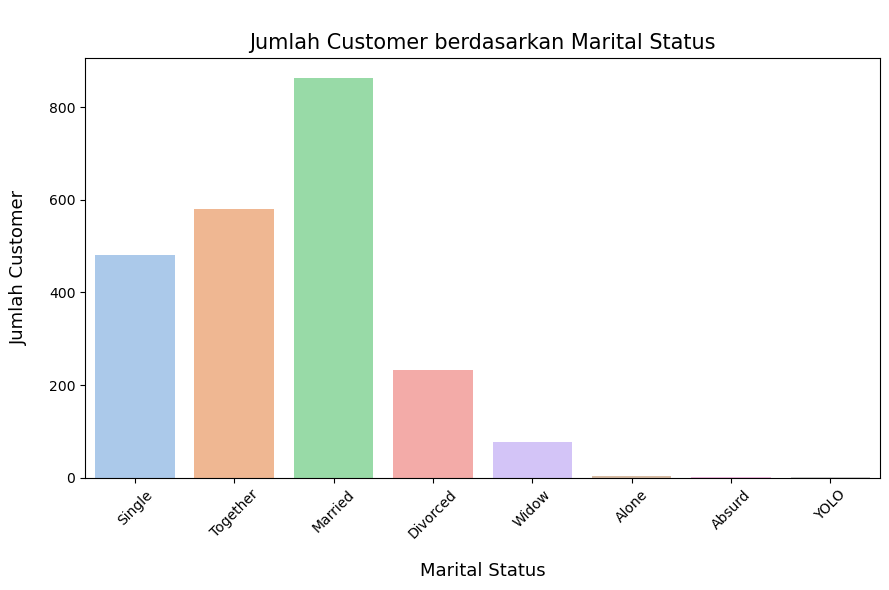

In [22]:
# Berikut visualisasi distribusi Customer berdasarkan Marital Status saja

# Membuat barchart berdasarkan data atau column yang dipilih atau dianalisa
plt.figure(figsize=(9, 6))
sns.countplot(
    data=df_marcamp,
    x="Marital_Status",
    palette="pastel"
)

# Menentukan judul & label pada barchart
plt.title('\nJumlah Customer berdasarkan Marital Status', fontsize=15)
plt.xlabel('Marital Status', labelpad=15, fontsize=13)
plt.ylabel('Jumlah Customer', labelpad=15, fontsize=13)
plt.xticks(rotation=45)

# Untuk menunjukkan barchart
plt.tight_layout()
plt.show()

In [23]:
# Menghapus 3 jenis outlier yaitu,
# 1. Customer dengan Year_Birth < 1935
# 2. Customer dengan Income > 200000
# 3. Customer dengan Marital_Status: Absurd, Alone dan YOLO

# Menentukan perimeter outlier yang akan di drop atau diabaikan
outlier_year_birth = df_marcamp.Year_Birth < 1935
outlier_income = df_marcamp.Income > 200000
outlier_marital_status = df_marcamp.Marital_Status.isin(["Absurd", "Alone", "YOLO"])

# Menghapus data outlier dari data frame yang sedang dianalisa
df_marcamp = df_marcamp[~outlier_year_birth]
df_marcamp = df_marcamp[~outlier_income]
df_marcamp = df_marcamp[~outlier_marital_status]

C:\Users\yohan\AppData\Local\Temp\ipykernel_23896\3780810102.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_marcamp = df_marcamp[~outlier_income]
C:\Users\yohan\AppData\Local\Temp\ipykernel_23896\3780810102.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_marcamp = df_marcamp[~outlier_marital_status]


Mari kita buat demografi Customer berdasarkan Marital Status dengan Income dan Education (exclude outlier)

In [25]:
# Menampilkan data mean Income Customer berdasarkan Marital Status
data_plot_marital_status_income = df_marcamp.groupby("Marital_Status")["Income"].mean().reset_index()
print(data_plot_marital_status_income)

  Marital_Status        Income
0       Divorced  52904.333333
1        Married  51727.207176
2         Single  50995.048017
3       Together  52116.769896
4          Widow  56423.350649


C:\Users\yohan\AppData\Local\Temp\ipykernel_23896\247962742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


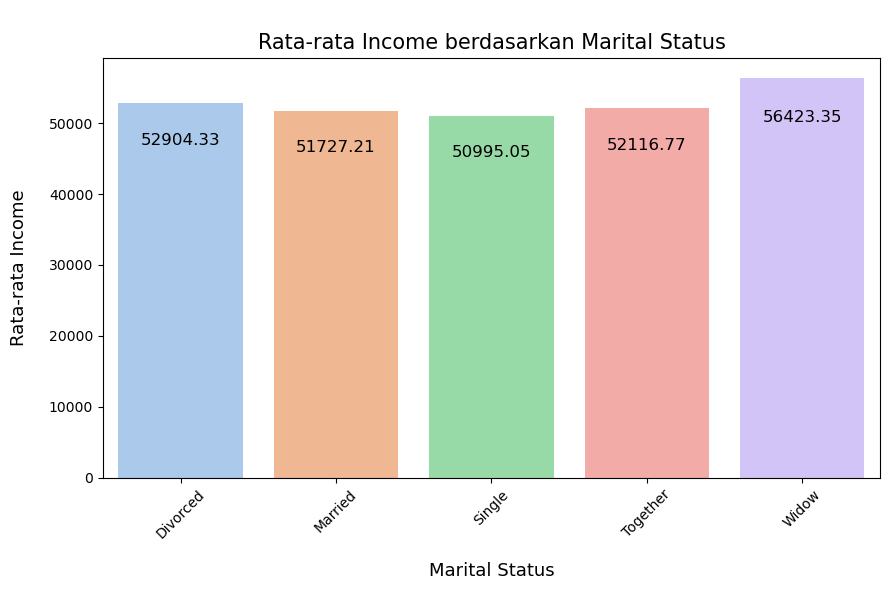

In [26]:
# Demografi Customer berdasarkan Marital Status & Income

# Membuat barchart berdasarkan data atau column yang dipilih atau dianalisa
plt.figure(figsize=(9, 6))
ax=sns.barplot(
    data=data_plot_marital_status_income,
    x="Marital_Status",
    y="Income",
    palette="pastel"
)

# Menentukan judul & label pada barchart
plt.title("\nRata-rata Income berdasarkan Marital Status", fontsize=15)
plt.xlabel("Marital Status", labelpad=15, fontsize=13)
plt.ylabel("Rata-rata Income", labelpad=15, fontsize=13)
plt.xticks(rotation=45)

# Untuk menampilkan angka di dalam barchart
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height - (height * 0.1)),
                    ha="center", va="center",
                    fontsize=12, color="black",
                    xytext=(0, 0), textcoords="offset points")

# Untuk menunjukkan barchart
plt.tight_layout()
plt.show()

In [27]:
# Dapat diperhatikan bahwa Income secara rata-rata tidak terdapat perbedaan yang signifikan antar setiap Marital Status

# Menampilkan jumlah dan presentase Customer berdasarkan Marital Status
marital_status_stats = pd.DataFrame({
    "Count": df_marcamp["Marital_Status"].value_counts(),
    "Percentage": (df_marcamp["Marital_Status"].value_counts(normalize=True) * 100).round(2)
})

print(marital_status_stats)

# Jumlah dan presentase masing-masing Marital_Status
# Married     864 (38.76%)
# Together    578 (25.93%)
# Single      479 (21.49)
# Divorced    231 (10.36)
# Widow        77 (3.45%)


                Count  Percentage
Marital_Status                   
Married           864       38.76
Together          578       25.93
Single            479       21.49
Divorced          231       10.36
Widow              77        3.45


In [28]:
# Menampilkan mean Income berdasarkan tingkat pendidikan atau Education
data_plot_income_education = df_marcamp.groupby("Education")["Income"].mean().reset_index().round(2)
print(data_plot_income_education)

    Education    Income
0    2n Cycle  47690.63
1       Basic  20306.26
2  Graduation  52160.01
3      Master  52848.05
4         PhD  56119.59


C:\Users\yohan\AppData\Local\Temp\ipykernel_23896\2976433427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


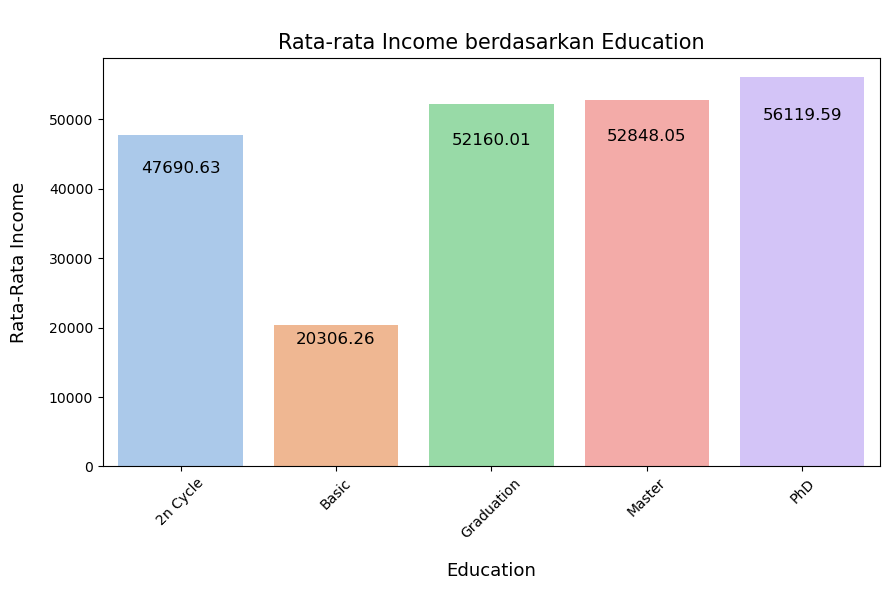

In [29]:
# Demografi Customer berdasarkan Education & Income

# Membuat barchart berdasarkan data atau column yang dipilih atau dianalisa
plt.figure(figsize=(9, 6))
ax = sns.barplot(
      data=data_plot_income_education,
      x="Education",
      y="Income",
      palette="pastel"
)

# Menentukan judul & label pada barchart
plt.title("\nRata-rata Income berdasarkan Education", fontsize=15)
plt.xlabel("Education", labelpad=15, fontsize=13)
plt.ylabel("Rata-Rata Income", labelpad=15, fontsize=13)
plt.xticks(rotation=45)

# Untuk menampilkan angka di dalam barchart
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height - (height * 0.1)),
                    ha="center", va="center",
                    fontsize=12, color="black",
                    xytext=(0, 0), textcoords="offset points")

# Untuk menunjukkan barchart
plt.tight_layout()
plt.show()

In [30]:
# Menampilkan jumlah Customer berdasarkan tingkat pendidikan atau Education saja
print(df_marcamp["Education"].value_counts())

Education
Graduation    1124
PhD            482
Master         368
2n Cycle       201
Basic           54
Name: count, dtype: int64


Terdapat perbedaan rata-rata Income berdasarkan Education yang cukup signifikan terutama bagi Customer dengan tingkat pendidikan,
1. Basic sebanyak 54 orang (mean 20306.26)
2. 2n Cycle sebanyak 201 orang (mean 47690.63)

Untuk tingkat pendidikan yang lain, rata-rata Income tidak terlalu ada perbedaan yang signifikan,
1. PHD sebanyak 482 orang (mean 56119.59)
2. Master sebanyak 368 orang (mean 52848.05)
3. Graduation sebanyak 1124 orang (mean 52160.01)

Berikut presentase masing-masing tingkat pendidikan ("Education) Customer,

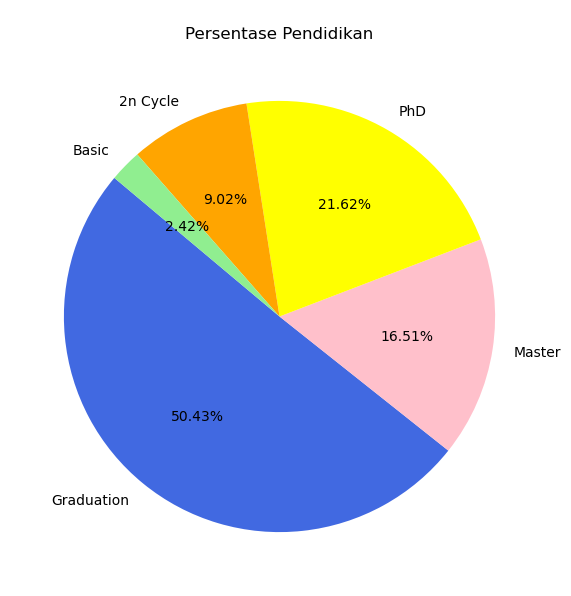

In [33]:
# Menentukan label dan size/nominal atas data tingkat Education
labels = ["Graduation", "Master", "PhD", "2n Cycle", "Basic"]
sizes = [1124, 368, 482, 201, 54]

# Membuat piechart tingkat Education
plt.figure(figsize=(9,7))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=140, colors=["royalblue", "pink", "yellow", "orange", "lightgreen"])

# Untuk menampilkan piechart
plt.title("\nPersentase Pendidikan")
plt.show()

Berdasarkan pie chart diatas, ditemukan bahwa sebesar 50.43% dari existing Customer memiliki level education Graduation. Di posisi kedua, sebesar 21.62% memiliki level education PhD, sedangkan untuk posisi ketiga sebesar 16.51% memiliki level education Master. Customer dengan level education 2n Cycle berada di posisi ke 4 sebesar 9.02% dan sebesar 2.42% memiliki level education Basic.

Sehingga mayoritas Customer yaitu sebesar 88.56% merupakan individu dengan tingkat pendidikan Graduation, Master dan PhD.

Bagaimana dengan kebiasaan pembelian produk dari sebagian besar Customer kita jika dilihat dari sisi usia dan tingkat pendidikan?

Terutama Customer dengan 3 tingkat pendidikan yaitu, Graduation, Master dan PhD, dimana berdasarkan data Marketing Campaign, Income segmen tersebut tidak terlalu jauh berbeda yaitu rata-rata > 50000 per tahun.

In [36]:
# Business Question 1
# Bagaimana kebiasaan konsumsi dari sebagian besar Customer jika dilihat dari sisi usia dan tingkat pendidikan?

<Figure size 1000x600 with 0 Axes>

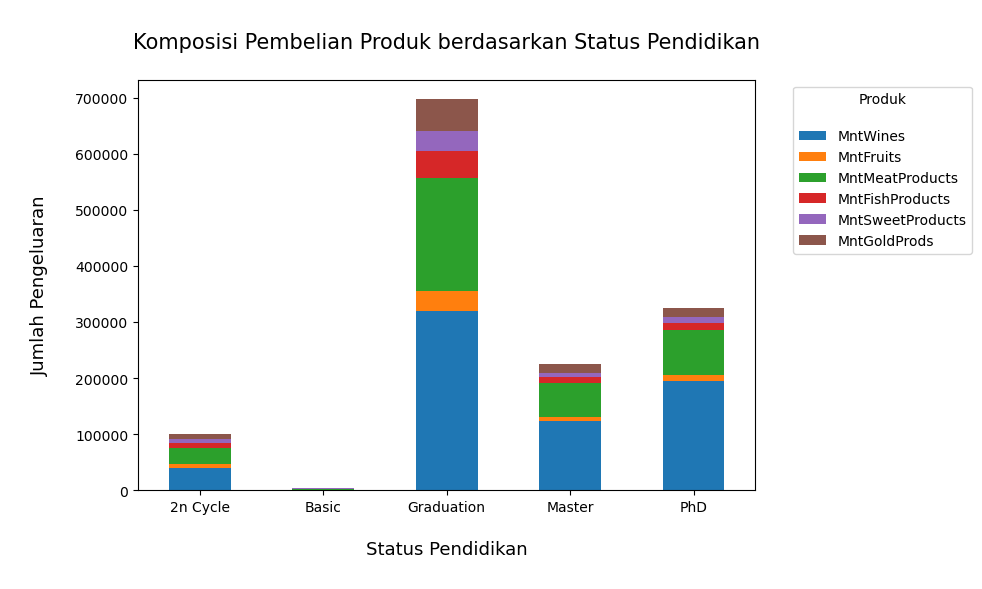

In [37]:
# Menegaskan tingkat pendidikan Customer yang akan di analisa
education_level = ["Graduation", "Master", "PhD", "2n Cycle", "Basic"]
df_filtered_marcamp_by_education = df_marcamp[df_marcamp["Education"].isin(education_level)]

# Menentukan column Products yang akan dianalisa serta total spending berdasarkan tingkat Education
product_columns = ["MntWines", 'MntFruits', "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
grouped_data = df_filtered_marcamp_by_education.groupby("Education")[product_columns].sum()

# Membuat data plotting dan menunjukkan komposisi spending
plt.figure(figsize=(10,6))
grouped_data.plot(kind="bar", stacked=True, figsize=(10,6))

# Menentukan judul dan menambahkan label pada chart
plt.title("\nKomposisi Pembelian Produk berdasarkan Status Pendidikan\n", fontsize=15, loc="center")
plt.xlabel("\nStatus Pendidikan\n", fontsize=13)
plt.ylabel("\nJumlah Pengeluaran\n", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Produk\n", bbox_to_anchor=(1.05, 1), loc="upper left")

# Untuk menampilkan stack barchart
plt.tight_layout()
plt.show()

In [38]:
print(df_marcamp[product_columns].describe().round(2))

       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count   2229.00    2229.00          2229.00          2229.00   
mean     304.23      26.27           167.15            37.46   
std      336.95      39.73           225.85            54.48   
min        0.00       0.00             0.00             0.00   
25%       24.00       1.00            16.00             3.00   
50%      173.00       8.00            68.00            12.00   
75%      505.00      33.00           232.00            50.00   
max     1493.00     199.00          1725.00           259.00   

       MntSweetProducts  MntGoldProds  
count           2229.00       2229.00  
mean              27.13         43.86  
std               41.34         51.90  
min                0.00          0.00  
25%                1.00          9.00  
50%                8.00         24.00  
75%               33.00         56.00  
max              263.00        362.00  


Berdasarkan grafik-grafik di atas, dapat disimpulkan bahwa Customer dengan Education atau tingkat pendidikan Graduation, Master dan PhD memiliki Income rata-rata yang lebih tinggi, sehingga memiliki tingkat pembelian (purchase) yang lebih tinggi, jauh melebihi Customer dengan tingkat pendidikan 2n Cycle dan Basic.

Adapun 3 produk terbanyak yang dibeli oleh Customer dengan 3 tingkat pendidikan tertinggi adalah sebagai berikut,
1. Wine (minuman anggur) yang direpresentasikan dengan MntWines,
2. Meat (daging) yang direpresentasikan dengan MntMeatProducts.
3. Gold (emas) yang direpresentasikan dengan MntGoldProds.

Wine dan Meat merupakan produk makanan yang populer dibeli oleh Customer-customer tersebut, dengan dispensable income yang lebih tinggi, mereka bisa membeli produk-produk makanan yang lebih premium untuk mendukung gaya hidup mereka.

Dengan tingkat pendidikan dan pendapatan yang tinggi, Customer juga tertarik dan antusias membeli produk Gold sebagai salah satu bentuk investasi jangka panjang yang aman.

Tentu saja hal ini juga dipengaruhi dengan kondisi politik dan perekonomian dunia yang tidak sestabil periode-periode sebelumnya, sehingga membuat Customer berinvestasi ke produk yang lebih aman, stabil dan cukup liquid. Customer-customer dengan tingkat pendidikan yang lebih tinggi juga memiliki pengetahuan finansial yang lebih baik.

Mari kita telurusi channel pembelian dari segmentasi Customer tersebut, kira-kira channel mana yang paling populer untuk dikunjungi?

Channel pembelian (Place) direpresentasikan dengan kode sebagai berikut,
1. NumWebPurchases
2. NumCatalogPurchases
3. NumStorePurchases

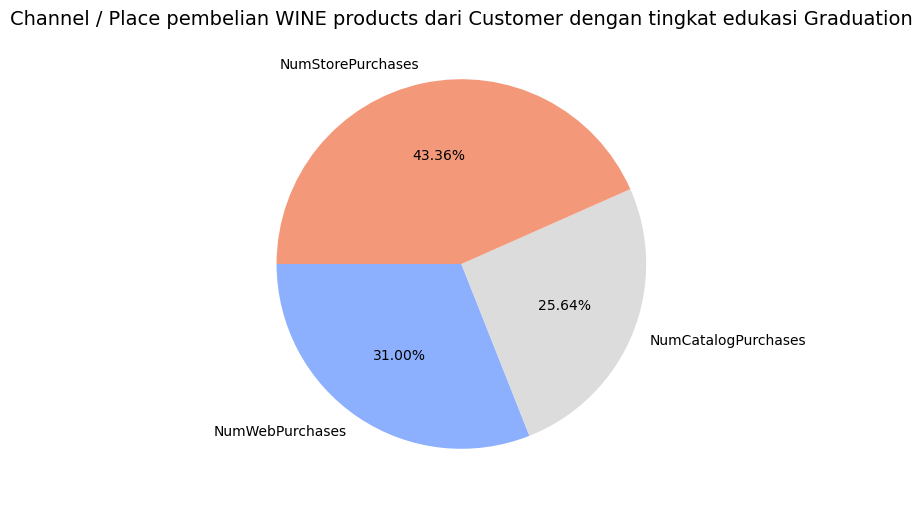

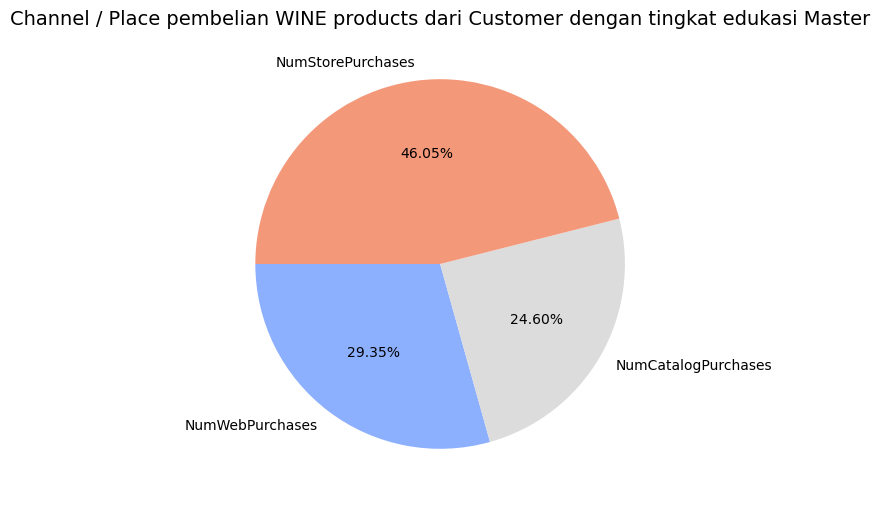

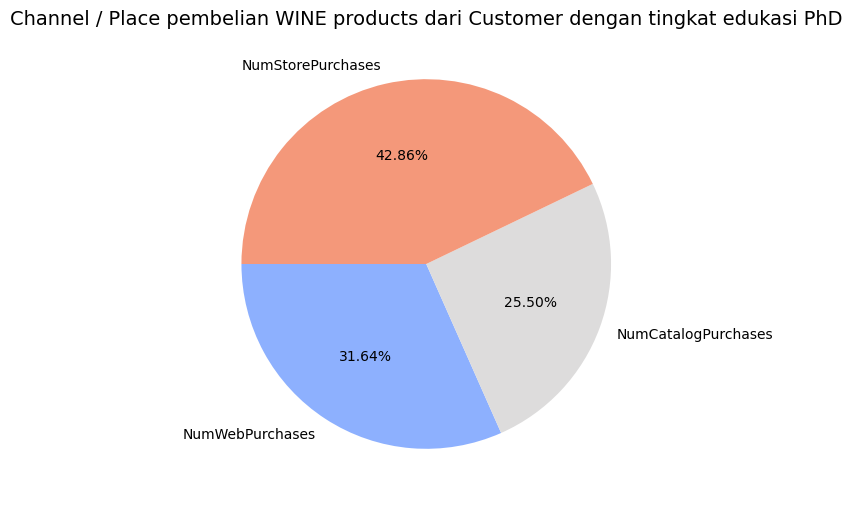

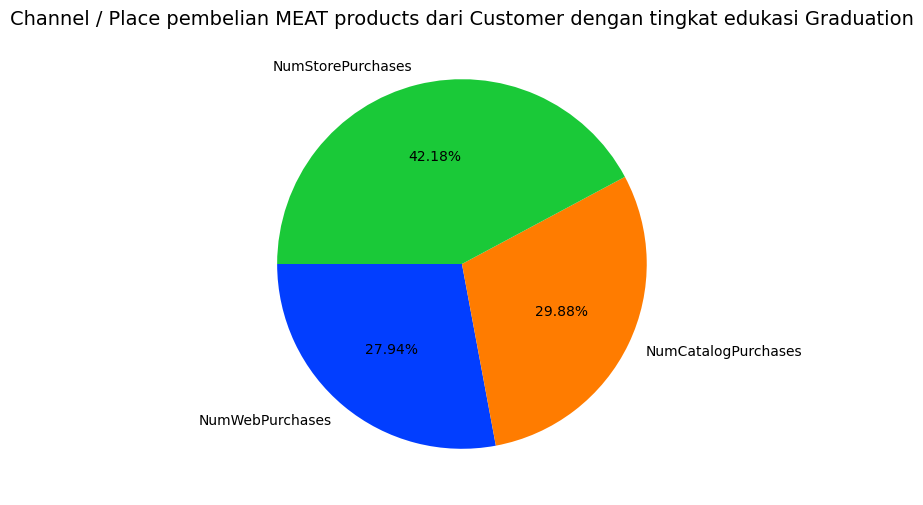

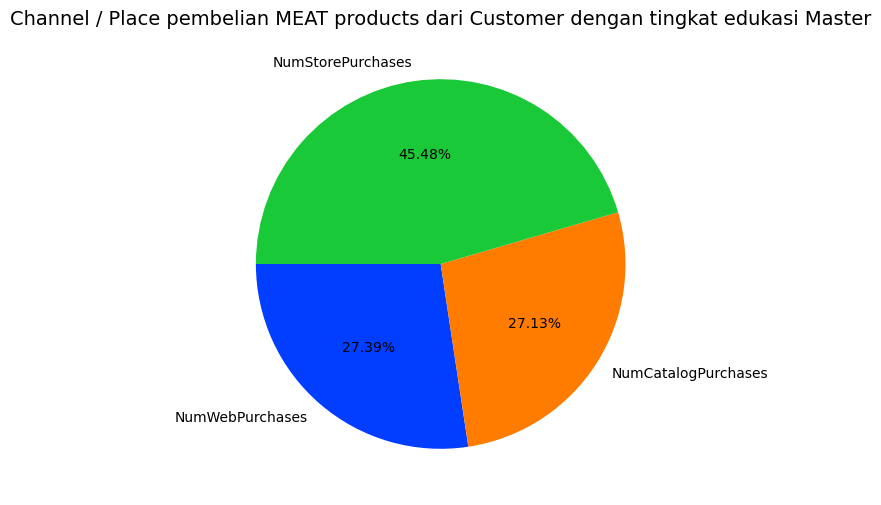

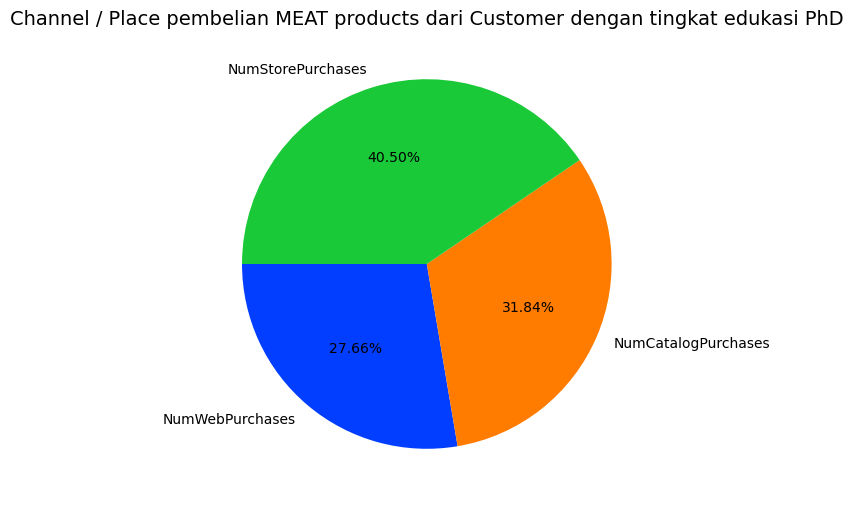

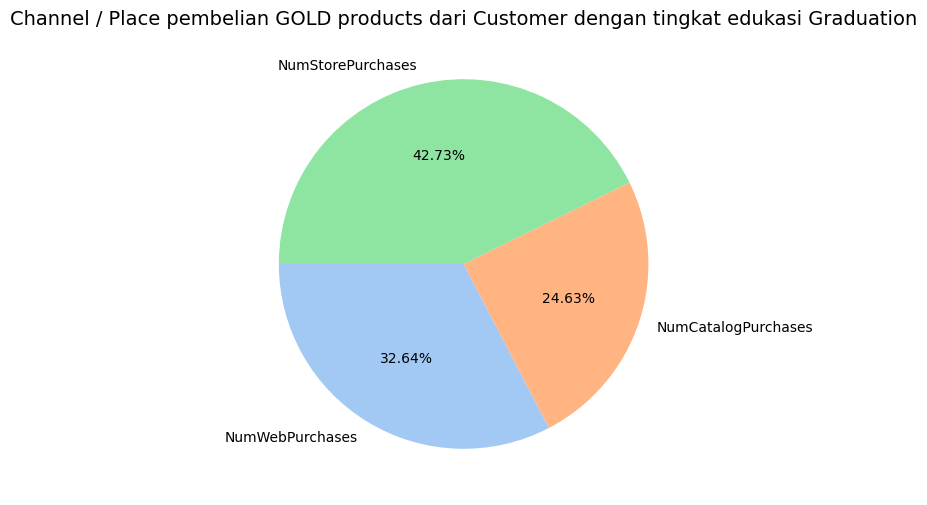

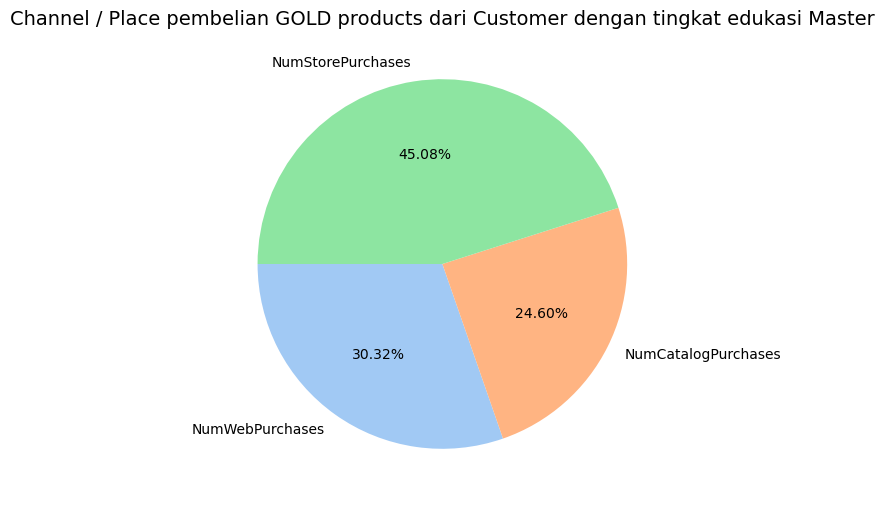

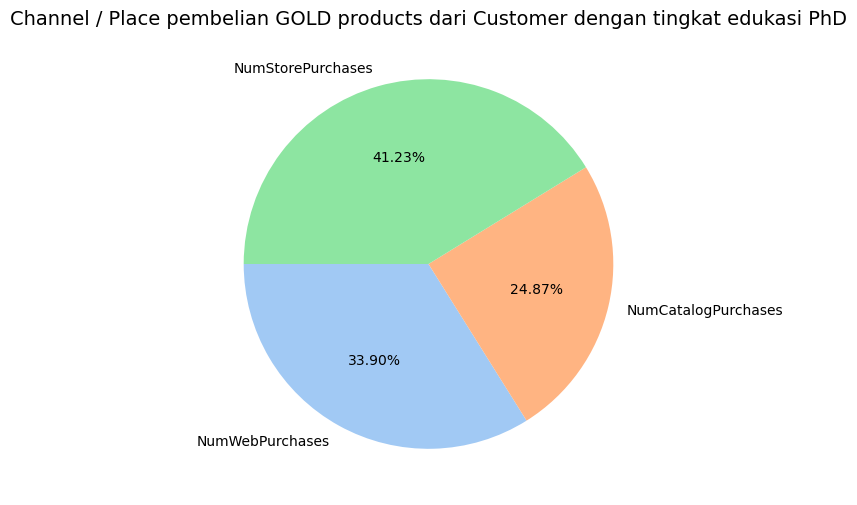

In [40]:
# Menegaskan tingkat pendidikan Customer yang akan di analisa
education_level_for_analysis = ["Graduation", "Master", "PhD"]
df_filtered_marcamp_by_education = df_marcamp[df_marcamp["Education"].isin(education_level_for_analysis)]

# Menghitung kontribusi penjualan per channel berdasarkan produk
def calculate_channel_contribution(df, product_column, channel_columns):
    contribution_data = {}
    for education in education_level_for_analysis:
        df_subset = df_marcamp[df_marcamp["Education"] == education]
        total_per_channel = {
            channel: df_subset[product_column].dot(df_subset[channel]) for channel in place_channel_columns
        }

        total_all = sum(total_per_channel.values())
        contribution_data[education] = {channel: (value / total_all) * 100 for channel, value in total_per_channel.items()}
    return contribution_data

# Place atau channel pembelian yang akan di analisa
place_channel_columns = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]

# Jenis produk yang di analisa berdasarkan Place hanya Wine dan Meat products saja
wine_channel_contribution = calculate_channel_contribution(df_filtered_marcamp_by_education, "MntWines", place_channel_columns)
meat_channel_contribution = calculate_channel_contribution(df_filtered_marcamp_by_education, "MntMeatProducts", place_channel_columns)
gold_channel_contribution = calculate_channel_contribution(df_filtered_marcamp_by_education, "MntGoldProds", place_channel_columns)

# Menentukan warna pie chart
palette1 = sns.color_palette("coolwarm", len(place_channel_columns))
palette2 = sns.color_palette("bright", len(place_channel_columns))
palette3 = sns.color_palette("pastel", len(place_channel_columns))

# Plot untuk Wine products
for education, contribution in wine_channel_contribution.items():
    plt.figure(figsize=(6, 6))
    plt.pie(contribution.values(), labels=contribution.keys(), autopct='%1.2f%%', startangle=180, colors=palette1)
    plt.title(f"Channel / Place pembelian WINE products dari Customer dengan tingkat edukasi {education}", fontsize=14)
    plt.show()

# Plot untuk Meat products
for education, contribution in meat_channel_contribution.items():
    plt.figure(figsize=(6, 6))
    plt.pie(contribution.values(), labels=contribution.keys(), autopct='%1.2f%%', startangle=180, colors=palette2)
    plt.title(f"Channel / Place pembelian MEAT products dari Customer dengan tingkat edukasi {education}", fontsize=14)
    plt.show()

# Plot untuk Gold products
for education, contribution in gold_channel_contribution.items():
    plt.figure(figsize=(6, 6))
    plt.pie(contribution.values(), labels=contribution.keys(), autopct='%1.2f%%', startangle=180, colors=palette3)
    plt.title(f"Channel / Place pembelian GOLD products dari Customer dengan tingkat edukasi {education}", fontsize=14)
    plt.show()


Berdasarkan beberapa pie chart diatas, pembelian produk Wine, Meat dan Gold oleh Customer dengan latar belakang pendidikan Graduation, Master dan PhD diatas 40% dilakukan secara langsung di Store.

Sehingga dapat disimpulkan bahwa daya tarik Customer membeli produk secara langsung di store (+/- 40% s.d. 45%) masih lebih tinggi dibandingkan dengan pembelian melalui Website dan Catalogue.

Namun jumlah pembelian melalui Website dan Catalogue jika dijumlahkan masih lebih tinggi dari Store, yaitu diatas 50% dari total pembelian.

Bagaimana dengan komposisi usia Customer dengan tingkat pendidikan Graduation, Master dan PhD?

In [42]:
# Tahun saat melakukan analisa data
current_year = 2025

# Menegaskan tingkat pendidikan atau Education dari Customer yang akan dianalisa
education_level_for_analysis = ["Graduation", "Master", "PhD"]
df_filtered_marcamp_by_education = df_marcamp[df_marcamp["Education"].isin(education_level_for_analysis)].copy()

# Untuk menghitung usia dan membuat kolom baru "Age" berdasarkan tingkat pendidikan
df_filtered_marcamp_by_education["Age"] = current_year - df_filtered_marcamp_by_education["Year_Birth"]

# Mengelompokkan statistik usia dengan tingkat pendidikan
age_statistics = df_filtered_marcamp_by_education.groupby("Education")["Age"].describe().round(0)

# Menampilkan statistik usia berdasarkan tingkat pendidikan yang dianalisa
print("Statistik usia Customer berdasarkan Tingkat Pendidikan:")
print(age_statistics)

Statistik usia Customer berdasarkan Tingkat Pendidikan:
             count  mean   std   min   25%   50%   75%   max
Education                                                   
Graduation  1124.0  55.0  11.0  30.0  47.0  55.0  65.0  81.0
Master       368.0  58.0  11.0  33.0  50.0  57.0  68.0  82.0
PhD          482.0  59.0  12.0  34.0  51.0  58.0  68.0  85.0


Berdasarkan statistik diatas, rentang rata-rata usia dari 88.56% Customer adalah 55 s.d. 58 tahun, dengan rentang usia minimum dan maximum masing-masing adalah 30 s.d. 34 tahun dan 81 s.d. 85 tahun.

Sehingga dapat disimpulkan bahwa rata-rata Customer merupakan gen X (kelahiran tahun 1965-1980) yang lebih menyukai berbelanja di Store atau toko dibandingkan berbelanja online lewat Website atau Catalogue.

Berikut visualisasinya menggunakan bar chart dengan error bars,

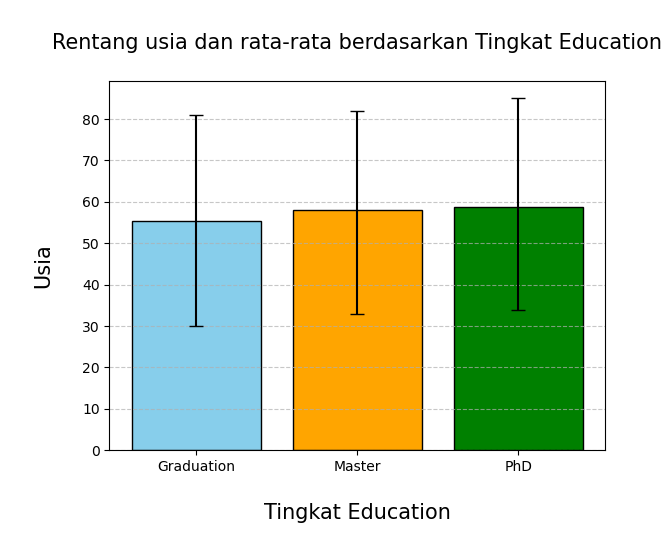

In [44]:
# Mengelompokkan statistik usia dengan tingkat pendidikan
age_statistics = df_filtered_marcamp_by_education.groupby("Education")["Age"].agg(["min", "max", "mean"])

# Membuat barchart sebaran usia
plt.bar(age_statistics.index, age_statistics["mean"], yerr=[age_statistics["mean"] - age_statistics["min"], age_statistics["max"] - age_statistics["mean"]],
        color=["skyblue", "orange", "green"], capsize=5, edgecolor="black")

# Label dan judul
plt.title("\nRentang usia dan rata-rata berdasarkan Tingkat Education\n", fontsize=15)
plt.xlabel("\nTingkat Education\n", fontsize=15)
plt.ylabel("\nUsia\n", fontsize=15)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Namun bagaimana dengan rentang usia Customer diatas yang terbiasa membeli produk melalui Website dan Catalogue?

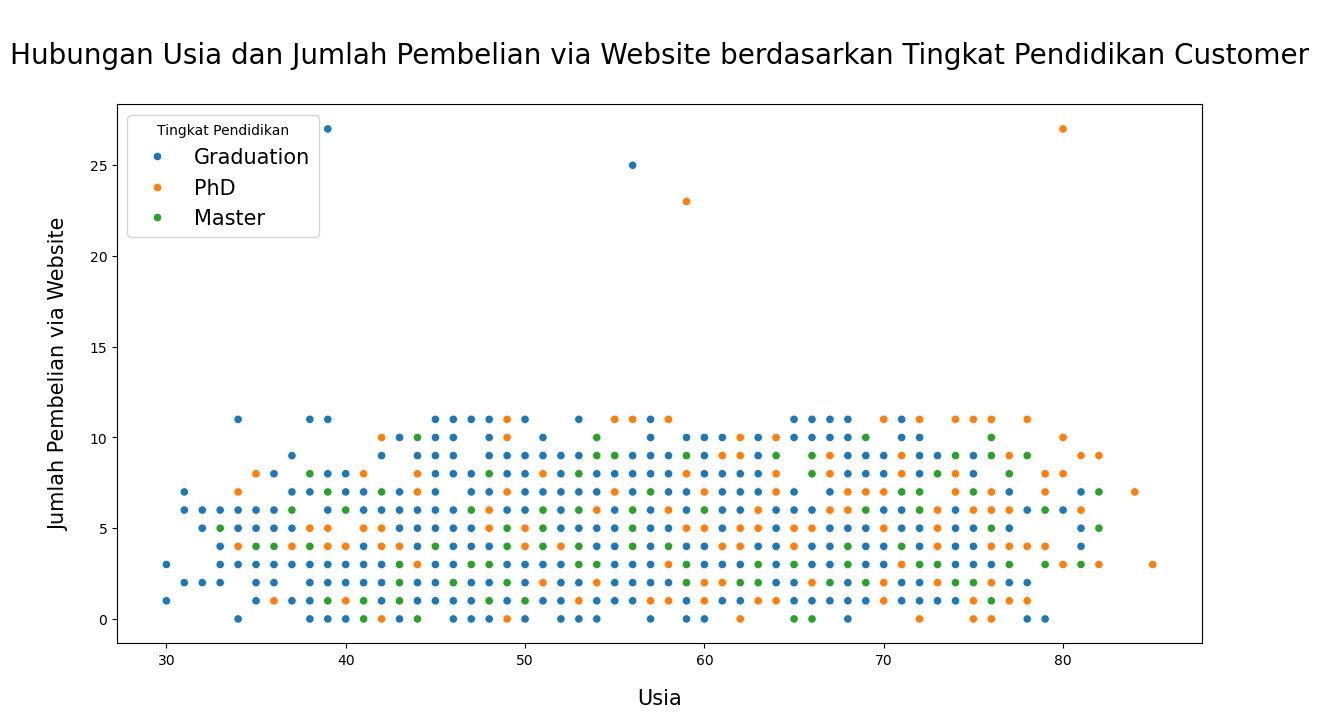

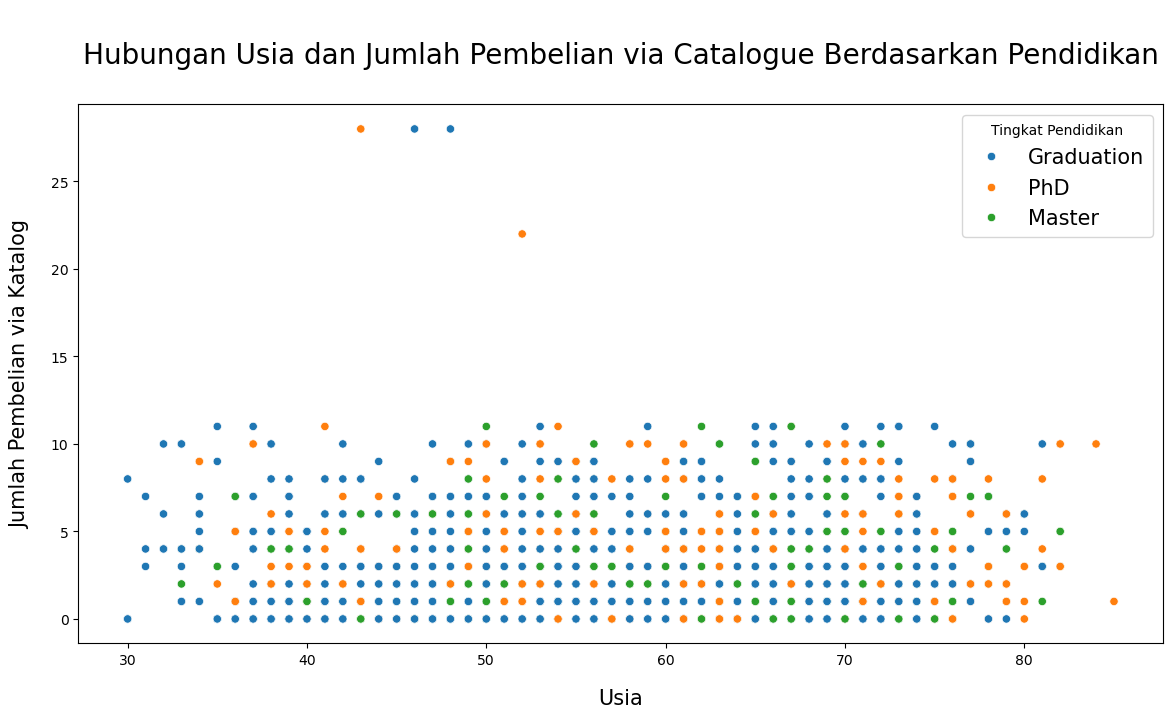

In [46]:
# Tahun saat melakukan analisa data
current_year = 2025

# Menambahkan column "Age" ke Data Frame original (df_marcamp)
df_marcamp["Age"] = current_year - df_marcamp["Year_Birth"]

# Menegaskan tingkat pendidikan atau Education dari Customer yang akan dianalisa
education_level_for_analysis = ["Graduation", "Master", "PhD"]
df_filtered_marcamp_by_education = df_marcamp[df_marcamp["Education"].isin(education_level_for_analysis)].copy()

# Visualisasi 1: Hubungan antara usia dan jumlah pembelian via website oleh Customer dengan tingkat pendidikan tertentu
plt.figure(figsize=(14, 7))
sns.scatterplot(x="Age", y="NumWebPurchases", hue="Education", data=df_filtered_marcamp_by_education)
plt.title("\nHubungan Usia dan Jumlah Pembelian via Website berdasarkan Tingkat Pendidikan Customer\n", fontsize=20)
plt.xlabel("Usia", labelpad=15, fontsize=15)
plt.ylabel("Jumlah Pembelian via Website", labelpad=15, fontsize=15)
plt.legend(title="Tingkat Pendidikan", fontsize=15)
plt.show()

# Visualisasi 2: Hubungan antara usia dan jumlah pembelian via katalog oleh Customer dengan tingkat pendidikan tertentu
plt.figure(figsize=(14, 7))
sns.scatterplot(x="Age", y="NumCatalogPurchases", hue="Education", data=df_filtered_marcamp_by_education)
plt.title("\nHubungan Usia dan Jumlah Pembelian via Catalogue Berdasarkan Pendidikan\n", fontsize=20)
plt.xlabel("Usia", labelpad=15, fontsize=15)
plt.ylabel("Jumlah Pembelian via Katalog", labelpad=15, fontsize=15)
plt.legend(title="Tingkat Pendidikan", fontsize=15)
plt.show()


Berdasarkan dua scatter plot diatas, ternyata usia dan status pendidikan Customer yang membeli produk lewat Website dan Catalogue tersebar merata di rentang usia 30 thn s.d. diatas 80 tahun dengan tingkat pendidikan Graduation, Master dan PhD.

Namun mayoritas atau sebagian besar frekuensi pembelian lewat Website dan Catalogue dibawah 10 kali dalam 2 tahun terakhir, hanya ada sebagian kecil Customer yang membeli produk lewat kedua channel atau Place tersebut hingga diatas 10 kali dalam kurun waktu yang sama.

Hal selanjutnya yang cukup menarik untuk diperhatikan adalah kebiasaan berbelanja Customer yang memiliki anak kecil maupun anak remaja di dalam rumahnya (dependent).

In [49]:
# Business Question 2
# Bagaimana korelasi antara belanja Customer dengan jumlah anak dan remaja di rumah?
# Jumlah anak = Kidhome
# Jumlah remaja = Teenhome

In [50]:
# Menambahkan jumlah anak dan remaja (dependents) yang ada dirumah masing-masing Customer
df_marcamp["Total_Dependents"] = df_marcamp["Kidhome"] + df_marcamp["Teenhome"]

# Memastikan penjumlahan sudah berjalan dengan baik dengan menunjukkan 5 baris pertama column "Total_Dependents"
print(df_marcamp[["Kidhome", "Teenhome", "Total_Dependents"]].head())

   Kidhome  Teenhome  Total_Dependents
0        0         0                 0
1        1         1                 2
2        0         0                 0
3        1         0                 1
4        1         0                 1


In [51]:
# Filter Customer dengan Total_Dependent = 0 (tidak ada tanggungan)
df_marcamp_no_dependents = df_marcamp[df_marcamp["Total_Dependents"] == 0]

# Filter Customer dengan Total_Dependent > 0 (ada tanggungan)
df_marcamp_with_dependents = df_marcamp[df_marcamp["Total_Dependents"] > 0]

# Menampilkan jumlah Customer dengan dan tanpa dependents
print(f"Jumlah Customer tanpa tanggungan anak dan atau remaja (Total_Dependents = 0) adalah: {len(df_marcamp_no_dependents)}")
print(f"Jumlah Customer dengan tanggungan anak dan atau remaja (Total_Dependents > 0) adalah: {len(df_marcamp_with_dependents)}")


Jumlah Customer tanpa tanggungan anak dan atau remaja (Total_Dependents = 0) adalah: 635
Jumlah Customer dengan tanggungan anak dan atau remaja (Total_Dependents > 0) adalah: 1594


C:\Users\yohan\AppData\Local\Temp\ipykernel_23896\3753320306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marcamp_no_dependents["Total_Purchases"] = (
C:\Users\yohan\AppData\Local\Temp\ipykernel_23896\3753320306.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marcamp_with_dependents["Total_Purchases"] = (


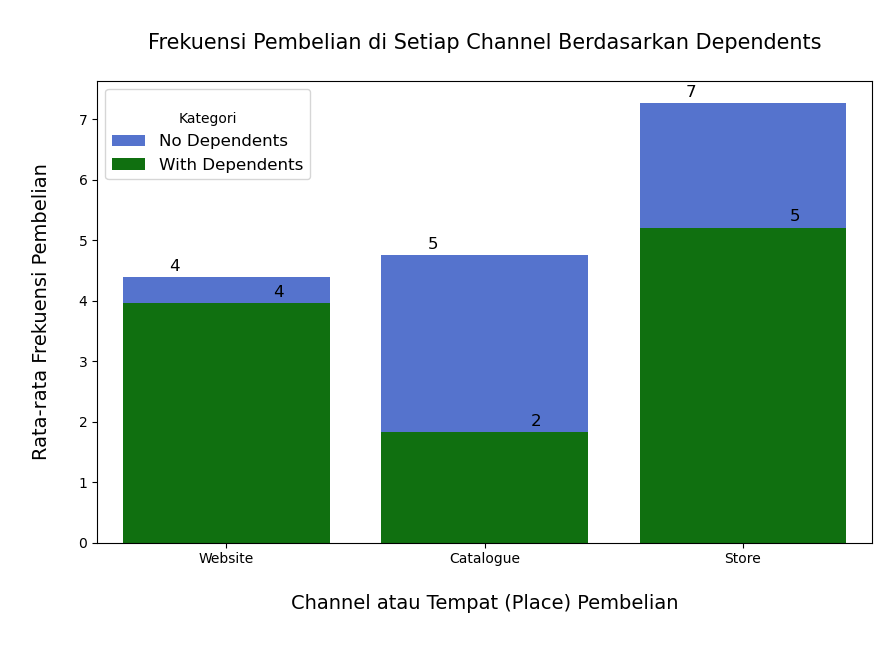

In [52]:
# Menambahkan total pembelian di setiap channel untuk setiap kelompok
df_marcamp_no_dependents["Total_Purchases"] = (
    df_marcamp_no_dependents["NumWebPurchases"] +
    df_marcamp_no_dependents["NumCatalogPurchases"] +
    df_marcamp_no_dependents["NumStorePurchases"]
)

df_marcamp_with_dependents["Total_Purchases"] = (
    df_marcamp_with_dependents["NumWebPurchases"] +
    df_marcamp_with_dependents["NumCatalogPurchases"] +
    df_marcamp_with_dependents["NumStorePurchases"]
)

# Rata-rata pembelian di setiap channel (place) untuk setiap kelompok
average_purchase_no_dependents = df_marcamp_no_dependents[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].mean()
average_purchase_with_dependents = df_marcamp_with_dependents[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].mean()

# Menggabungkan hasil untuk visualisasi
average_df_channel_place = pd.DataFrame({
    "Channel_place": ["Website", "Catalogue", "Store"],
    "No_dependents": average_purchase_no_dependents.values,
    "With_dependents": average_purchase_with_dependents.values
})

# Visualisasi data
plt.figure(figsize=(10, 6))
ax=sns.barplot(x="Channel_place", y="No_dependents", data=average_df_channel_place, color="royalblue", label="No Dependents")
sns.barplot(x="Channel_place", y="With_dependents", data=average_df_channel_place, color="green", label="With Dependents")

# Menambahkan angka di atas stack bar untuk Customer with No Dependents
for index, row in average_df_channel_place.iterrows():
    ax.text(index - 0.2, row["No_dependents"] + 0.1,
            f'{row["No_dependents"]:.0f}', color='black', ha="center", fontsize=12)

# Menambahkan angka di atas stack bar untuk Customer with Dependents
for index, row in average_df_channel_place.iterrows():
    ax.text(index + 0.2, row["With_dependents"] + 0.1,
            f'{row["With_dependents"]:.0f}', color='black', ha="center", fontsize=12)

plt.title("\nFrekuensi Pembelian di Setiap Channel Berdasarkan Dependents\n", fontsize=15)
plt.xlabel("\nChannel atau Tempat (Place) Pembelian\n", fontsize=14)
plt.ylabel("\nRata-rata Frekuensi Pembelian\n", fontsize=14)
plt.legend(title="\nKategori", fontsize=12)
plt.show()


Berdasarkan stackbar diatas, untuk Customer yang tidak memiliki tanggungan lebih suka berbelanja melalui Website dan Store daripada membeli lewat Catalogue. Sebaliknya Customer yang telah memiliki tanggungan lebih sering berbelanja secara langsung lewat Store melalui Catalogue.

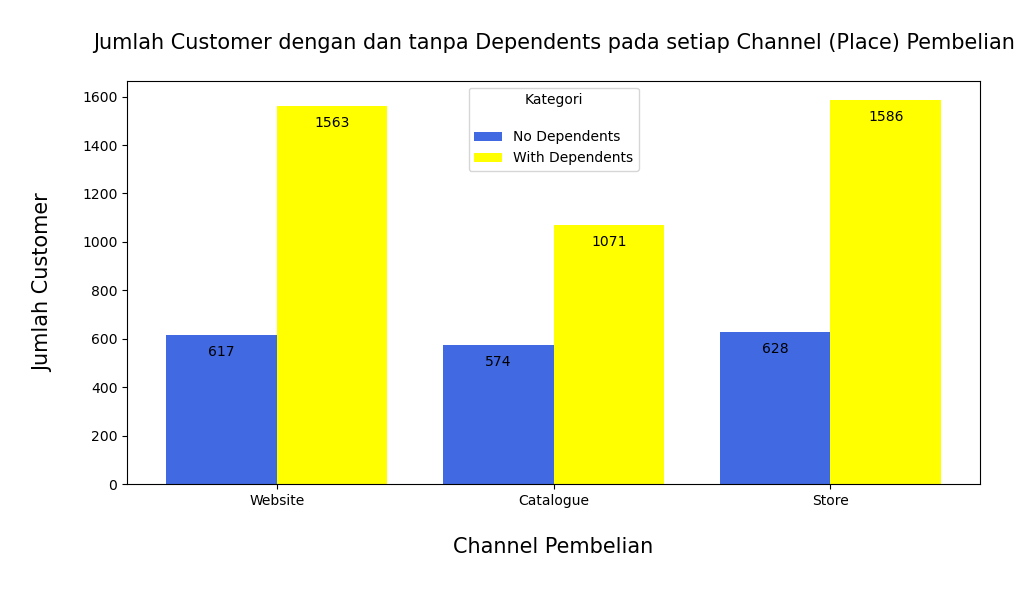

In [54]:
# Menghitung jumlah Customer pada setiap channel berdasarkan ada atau tidaknya dependents
customer_no_dependents_counts = [
    (df_marcamp_no_dependents["NumWebPurchases"] > 0).sum(),
    (df_marcamp_no_dependents["NumCatalogPurchases"] > 0).sum(),
    (df_marcamp_no_dependents["NumStorePurchases"] > 0).sum()
]

customer_with_dependents_counts = [
    (df_marcamp_with_dependents["NumWebPurchases"] > 0).sum(),
    (df_marcamp_with_dependents["NumCatalogPurchases"] > 0).sum(),
    (df_marcamp_with_dependents["NumStorePurchases"] > 0).sum()
]

# Mempersiapkan visualisasi data customer, dependents dan channel (place) pembelian
channels_place = ["Website", "Catalogue", "Store"]
bar_width = 0.40
x = range(len(channels_place))

fig, ax = plt.subplots(figsize=(10, 6))

# Barchart untuk Customer with No Dependents
bars1 = ax.bar(x, customer_no_dependents_counts, bar_width, label="No Dependents", color="royalblue")

# Barchart untuk Customer with Dependents
bars2 = ax.bar([p + bar_width for p in x], customer_with_dependents_counts, bar_width, label="With Dependents", color="yellow")

# Menambahkan angka di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height-100, f'{int(height)}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height-100, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Menambahkan label, judul, dan legend
ax.set_xlabel("\nChannel Pembelian\n", fontsize=15)
ax.set_ylabel("\nJumlah Customer\n", fontsize=15)
ax.set_title("\nJumlah Customer dengan dan tanpa Dependents pada setiap Channel (Place) Pembelian\n", fontsize=15)
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(channels_place)
ax.legend(title="Kategori\n", fontsize=10)

plt.tight_layout()
plt.show()


Berdasarkan visualisasi data Customer dengan dan tanpa tanggungan anak-anak dan remaja (dependents) diatas, ditemukan bahwa Customer dengan tanggungan/dependents melakukan lebih banyak pembelian atau belanja di ketiga channel (place) tersebut, baik melalui Website, Catalogue dan Store.

Beberapa hal yang dapat dipetik dari hasil analisa diatas adalah sebagai berikut,

1. Mayoritas Customer berstatus Married atau sudah menikah, diikuti oleh Together, Single, Divorced (cerai) dan Widow (janda/duda).

2. Tidak ada perbedaan rata-rata Income yang signifikan berdasarkan Marital Status atau status pernikahan, rata-rata Income tertinggi adalah Customer yang telah bercerai, meskipun hanya 3.45% dari total Customer.

3. Top 3 kelompok Customer dengan rata-rata penghasilan tertinggi adalah mereka dengan Tingkat Pendidikan PhD (21.62%), Master (16.51%) dan Graduation (50.43%), dimana jika masing-masing dijumlah maka mereka merupakan 88.56% dari total Customer.

4. Top 3 products yang rutin dibeli oleh mayoritas Customer adalah wine, meat dan gold products.

5. Mayoritas pembelian top 3 products diatas dilakukan secara langsung dengan datang ke store (+/- 40% s.d. 45%), sisanya dilakukan lewat website dan catalogue (+/- 55% s.d. 60%).

6. Rata-rata usia dari 88,56% Customer berada dikisaran 55 thn s.d. 59 thn dimana masuk dalam kategori Gen X yang diasumsikan tidak terlalu tech savy dan lebih buka melakukan pembelian produk secara langsung di store dibandingkan melalui website maupun catalogue.

7. Customer yang telah memiliki tanggungan anak-anak maupun remaja lebih sering berbelanja dibandingkan Customer yang belum ada tanggungan, diasumsikan karena jenis dan jumlah kebutuhannya lebih banyak.

8. Customer yang memiliki tanggungan lebih suka berbelanja di store dan website dibandingkan lewat catalogue, begitu juga dengan Customer yang belum memiliki tanggungan.

9. Namun secara angka jika ditelaah lebih jauh, selisih jumlah Customer tanpa tanggungan yang berbelanja di ketiga channel (place) tersebut tidak memiliki perbedaan yang signifikan.

Peluang yang dapat dipertimbangkan oleh manajemen perusahaan adalah sebagai berikut,

1. Bila ingin menambah jumlah database Customer (ID), perusahaan bisa menawarkan membership kepada anak-anak dari Customer yang sudah memasuki usia remaja. Sehingga bisa memberikan menambah produk berikut promo-promo yang berkaitan dengan segmen tersebut. Customer berusia remaja tersebut kedepannya juga bisa berpeluang menjadi regular Customer saat sudah dewasa dan berpenghasilan sendiri, serta sudah terlebih dahulu masuk ke dalam database Customer.

2. Memberikan benefit tambahan pada Customer yang memberikan referal terutama anak-anaknya yang telah berusia remaja untuk mendaftar menjadi member, misal: tambahan sedikit diskon untuk pembelian produk yang rutin dibeli oleh mereka (wine, meat dan gold).

3. Menambah produk investasi yang bisa dijangkau oleh Customer dengan tingkat pendidikan dan income yang lebih rendah, misalnya: emas dengan berat yang lebih kecil dan perak jika belum ada.

4. Mempersiapkan channel penjualan baru (mis. aplikasi hp) atau memperbaiki channel penjualan website dan catalogue untuk antisipasi perubahan kebiasaan Customer di masa depan.


